# Pre-process and load the dateset

In [2]:
import re 
import pandas as pd
import numpy as np 
# from BetaPose import utils


def loaddb(dbfile):
  with open(dbfile, "r") as file1: 
    lines = [i.strip() for i in file1.read().split("\n")]
    lines = [i for i in lines if len(i)>0 and i[0]!="#"]
    lines = [re.sub(r"//.*", "", i).strip() for i in lines]
    table = [i.split() for i in lines]
  table = pd.DataFrame(table, columns = ["PDB","resolution","year","affinity","kd/ki"]);
  table['year'] = table['year'].astype(int)
  table['resolution'] = table['resolution'].astype(float)
  table['affinity'] = table['affinity'].astype(float)
  return table

  
# Pre-process the PDBBind-refined dataset (CSV)
PB_setfile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_refined_data.2020"
table = loaddb(PB_setfile)
a = list(table.PDB)
print(f"All Entries: {len(a)} ; Unique Entries: {len(set(a))}")

All Entries: 5316 ; Unique Entries: 5316


(array([185., 432., 745., 860., 983., 951., 642., 312., 140.,  66.]),
 array([ 2.   ,  2.992,  3.984,  4.976,  5.968,  6.96 ,  7.952,  8.944,
         9.936, 10.928, 11.92 ]),
 <BarContainer object of 10 artists>)

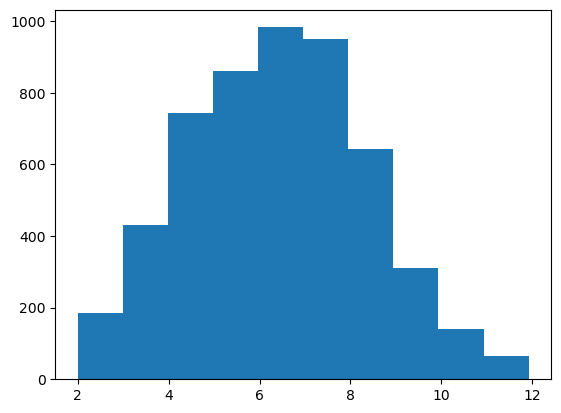

In [7]:
import matplotlib.pyplot as plt
# plt.hist(table.year.astype(int), bins=10)
plt.hist(table.affinity.astype(float), bins=10)

# Only keep the selected entries

In [6]:
# Reference: 
# Marchand, Jean-Rémy, et al. "An ABSINTH-Based Protocol for Predicting Binding Affinities between Proteins and Small Molecules." Journal of Chemical Information and Modeling 60.10 (2020): 5188-5202.
# 754 entries

abs_sel = ['1a4k','1a4w','1a69','1a8i','1a99','1aaq','1adl','1ai4','1ai5','1ai7','1aid','1ajn','1ajp','1ajq','1ajv','1ajx','1apw','1ax0','1axz','1b05','1b0h','1b1h','1b40','1b46','1b6h','1b6k','1b7h','1b9j','1bcu','1bdq','1bgq','1bhx','1bju','1bjv','1bq4','1br6','1bv7','1bv9','1bwa','1c3x','1c5n','1c5o','1c5p','1c5q','1c5s','1c5t','1c5x','1c5y','1c5z','1c70','1c83','1c84','1c86','1c87','1c88','1ce5','1cea','1ceb','1d4h','1d4i','1d4k','1d4l','1d6v','1d7i','1d7j','1db1','1df8','1dfo','1dhi','1dhj','1dmp','1drk','1dzk','1e1v','1e1x','1e2k','1e2l','1e3v','1e6s','1eb2','1ebw','1eby','1ebz','1ec0','1ec1','1ecv','1efy','1ejn','1ela','1eld','1ele','1enu','1epo','1erb','1ezq','1f0r','1f0u','1f4e','1f4g','1f4x','1fcx','1fcy','1fcz','1fd0','1fh7','1fh8','1fh9','1fhd','1fj4','1fkg','1fkh','1fki','1fl3','1fpc','1g2k','1g2l','1g30','1g32','1g35','1g36','1g74','1g7g','1g85','1gcz','1ghv','1ghw','1ghz','1gi1','1gi7','1gj6','1gja','1gni','1gpn','1gu1','1gyx','1gyy','1gzc','1h1p','1h1s','1h22','1h23','1h9z','1ha2','1hbv','1hmr','1hms','1hmt','1hps','1hpv','1hpx','1hsh','1hvh','1hvi','1hvj','1hvk','1hvl','1hvr','1hvs','1hwr','1hxb','1hxw','1i00','1i5r','1igj','1ii5','1izh','1izi','1j14','1j16','1j17','1j4r','1jak','1jet','1jgl','1jqy','1jsv','1jwt','1jys','1jzs','1k1i','1k1j','1k1l','1k1m','1k1n','1k21','1k22','1k4g','1k4h','1kdk','1kv1','1kyv','1kzk','1kzn','1l2s','1l83','1laf','1lag','1lah','1lbk','1lee','1lf2','1lgw','1li2','1li3','1li6','1lke','1lnm','1lpg','1lpk','1lpz','1lst','1m2q','1m2r','1m48','1mes','1met','1mfi','1mq5','1mq6','1mrw','1mrx','1msm','1msn','1mtr','1mu6','1mu8','1n1m','1n1t','1n2v','1n46','1n4h','1n7m','1n8v','1nc1','1nc3','1nf8','1nfu','1nfw','1nfy','1nhu','1nl9','1nli','1nny','1no6','1nq7','1nt1','1nvq','1nvr','1nvs','1nw7','1nz7','1o2o','1o2q','1o2s','1o2w','1o2x','1o2z','1o30','1o33','1o36','1o3d','1o3i','1o3j','1o3k','1o3p','1o5a','1o5b','1o5c','1o5e','1o5g','1oba','1ocq','1od8','1odi','1odj','1ogd','1ogz','1ohr','1ony','1onz','1os5','1oss','1owe','1owh','1oyq','1oyt','1p1n','1p1o','1p1q','1p57','1pb8','1pb9','1pbq','1pot','1ppc','1pph','1pr1','1pxn','1pxp','1pzi','1q63','1q65','1q66','1q72','1q8t','1qan','1qaw','1qb1','1qbn','1qbo','1qbr','1qbs','1qbu','1qbv','1qi0','1qiw','1qy1','1qy2','1r0p','1r4w','1r5y','1r6n','1r9l','1rd4','1rpj','1s38','1sbg','1sdt','1sdu','1sdv','1sgu','1sh9','1siv','1sqo','1sr7','1srg','1ssq','1stc','1sv3','1sw2','1swg','1swr','1syh','1syi','1t4v','1t7j','1ta2','1ta6','1tcw','1tcx','1td7','1tng','1tnh','1tni','1tog','1toi','1toj','1tok','1tom','1u1w','1ugw','1ugx','1uou','1upf','1urg','1usi','1usk','1utj','1utl','1utm','1utn','1uv6','1uvt','1uw6','1uwf','1uz4','1v0k','1v0l','1v1j','1v2j','1v2k','1v2l','1v2n','1v2o','1v2q','1v2r','1v2s','1v2t','1v2u','1v2w','1vfn','1vj9','1vja','1vyf','1vyg','1vyq','1vzq','1w0z','1w11','1w13','1w3j','1w3k','1w5v','1w5w','1w5x','1w5y','1wcq','1wdn','1we2','1wht','1wm1','1ws4','1ws5','1x8j','1x9d','1xap','1xff','1xgi','1xgj','1xhy','1xk9','1xka','1xkk','1xow','1xt8','1y1z','1y20','1y3n','1y6q','1y6r','1yc1','1yc4','1ydk','1ydr','1yds','1ydt','1yqj','1z1r','1z6e','1zgi','1zhy','1zoe','1zog','1zp8','220l','2a4m','2a8g','2aac','2aj8','2aqu','2avo','2avs','2avv','2ayr','2azr','2b07','2b1v','2b4l','2bak','2bal','2boh','2bok','2bpv','2bpy','2bq7','2bqv','2br1','2brb','2brm','2bt9','2bvd','2bvr','2bvs','2byr','2bys','2bz6','2bza','2c1p','2c3l','2cbu','2cej','2cen','2cgf','2cht','2cji','2csn','2d0k','2d3u','2d3z','2drc','2dri','2e2r','2e7f','2epn','2exm','2f1g','2f2h','2f34','2f35','2f5t','2f80','2f81','2f8g','2fgu','2fgv','2flr','2fpz','2fqw','2fqx','2fr3','2fw6','2fwp','2fx6','2fxu','2g79','2g8r','2g94','2gl0','2glp','2gss','2gst','2gv6','2gv7','2h4g','2h4k','2h6b','2ha2','2ha3','2ha5','2ha6','2hb1','2hb3','2hhn','2hjb','2hs1','2hs2','2hxm','2i0a','2i2b','2i4j','2i4u','2i4v','2i80','2idw','2ien','2ieo','2ihq','2iko','2il2','2iuz','2iwx','2izl','2j2u','2j34','2j47','2j4g','2j4i','2j77','2j7e','2j7g','2j7h','2j9n','2jds','2jfz','2jh0','2jh5','2jh6','2jiw','2nmy','2nmz','2nnk','2nnp','2nt7','2nta','2o0u','2o2u','2o4j','2o4k','2o4r','2o4s','2oag','2ogy','2ojg','2ojj','2ok1','2on6','2oxd','2oxx','2oxy','2oyk','2oym','2p16','2p4j','2p4y','2p7a','2p7z','2p95','2pcp','2pgz','2pk5','2pk6','2pql','2pqz','2psu','2psv','2pu2','2pvh','2pvj','2pvk','2pvl','2pwc','2pwd','2pwg','2pwr','2pyn','2q54','2q55','2q5k','2q63','2q64','2q88','2q89','2qbq','2qbr','2qbs','2qbu','2qci','2qd6','2qd7','2qd8','2qe4','2qfo','2qg0','2qg2','2qhm','2qhy','2qhz','2qi0','2qi1','2qi3','2qi4','2qi5','2qi6','2qi7','2qm9','2qmg','2qnn','2qnq','2qrl','2qt5','2qtg','2qu6','2r2m','2r2w','2r38','2r3t','2r3w','2r43','2r5a','2r5p','2r6w','2r6y','2ra0','2rcb','2ri9','2rkf','2rkg','2sim','2std','2tpi','2uwo','2uxz','2uy0','2v00','2v3u','2v95','2vh6','2vkm','2vnt','2vw5','2vyt','2z4b','2zb0','2zb1','3aid','3b4p','3b50','3b5r','3b65','3b66','3b67','3b68','3b7j','3be9','3bex','3bfu','3bgb','3bgc','3bgq','3bgz','3bra','3brn','3bu1','3buf','3bug','3buh','3bvb','3c2u','3cct','3ccw','3ccz','3cd0','3cd5','3cd7','3cda','3cdb','3cf8','3cj2','3cj4','3cj5','3ckp','3cs7','3cyw','3cyx','3d0b','3d1x','3d1y','3d1z','3d20','3d7z','3d83','3d94','3djk','3e5a','3e5u','3e64','3e92','3e93','3ebl','3eko','3ekr','3eqr','3f8c','3f8f','3gss','3gst','3jdw','3kiv','4ts1','5er1','5std','5yas','6std','7std']
abs_sel = [i.upper() for i in abs_sel]; 
abs_sel = list(set(abs_sel)); 
print(f"ABSINTH Entries: {len(abs_sel)} ; ABSINTH Unique: {len(set(abs_sel))}"); 

table_abs = pd.DataFrame(columns = ["PDB","resolution","year","affinity","kd/ki"])
for i in abs_sel:
  theline = table.loc[table.PDB == i.lower()]
  if len(theline) > 0:
    table_abs = pd.concat([table_abs,theline],ignore_index=True)

table_abs = table_abs.reset_index()
table_abs = table_abs.set_index("index")
table_abs
# print(len(table_abs))

ABSINTH Entries: 754 ; ABSINTH Unique: 754
668


# Calculate the Ligand Embeding Factor/Heavy Atom Number

In [8]:
import re 
import pandas as pd 
import numpy as np 
from BetaPose import utils

basepath = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/"

emb_factor = []; 
c_nha = []; 
l_nha = []; 
for idx,row in table_abs.iterrows():
#   if idx == 5:
#     break
  pdbcode = row.PDB; 
  embfactor = utils.EmbeddingFactor(basepath, pdbcode)
  complex_nha = utils.PRO_nha(f"{basepath}/{pdbcode}/{pdbcode}_complex.pdb"); 
  lig_nha = utils.LIG_nha(f"{basepath}/{pdbcode}/{pdbcode}_complex.pdb")
  emb_factor.append(embfactor)
  c_nha.append(complex_nha); 
  l_nha.append(lig_nha);
#   print(pdbcode, embfactor, complex_nha, lig_nha)
if len(emb_factor) == len(c_nha) and len(emb_factor) == len(l_nha) and len(emb_factor) == len(table_abs):
  print("Success")
  table_abs["embedding_factor"] = emb_factor; 
  table_abs["complex_nha"] = c_nha; 
  table_abs["lig_nha"] = l_nha; 
else: 
  print(f"Failed to match entry length {len(table_abs)} {len(emb_factor)} {len(c_nha)} {len(l_nha)}")


Surface contribution: 50.3763; Surface pure: 678.541
Surface contribution: 248.8757; Surface pure: 630.763
Surface contribution: 33.1718; Surface pure: 359.648
Surface contribution: 234.8653; Surface pure: 693.081
Surface contribution: 93.8005; Surface pure: 784.74
Surface contribution: 4.1203; Surface pure: 727.186
Surface contribution: 164.2154; Surface pure: 472.261
Surface contribution: 121.1886; Surface pure: 588.103
Surface contribution: 82.0514; Surface pure: 341.927
Surface contribution: 188.401; Surface pure: 864.358
Surface contribution: 105.2899; Surface pure: 431.047
Surface contribution: 117.4672; Surface pure: 679.113
Surface contribution: 54.9268; Surface pure: 381.786
Surface contribution: 210.0604; Surface pure: 785.924
Surface contribution: 62.4585; Surface pure: 623.89
Surface contribution: 56.8772; Surface pure: 304.011
Surface contribution: 60.7131; Surface pure: 363.42
Surface contribution: 106.9282; Surface pure: 554.21
Surface contribution: 88.8106; Surface pure

Surface contribution: 80.0326; Surface pure: 487.344
Surface contribution: 1.3913; Surface pure: 269.769
Surface contribution: 104.0153; Surface pure: 736.341
Surface contribution: 145.8319; Surface pure: 546.273
Surface contribution: -16.4365; Surface pure: 334.442
Surface contribution: 122.4085; Surface pure: 739.796
Surface contribution: 50.6867; Surface pure: 356.628
Surface contribution: 37.2155; Surface pure: 317.766
Surface contribution: 50.689; Surface pure: 699.391
Surface contribution: 71.3438; Surface pure: 596.746
Surface contribution: 77.0071; Surface pure: 454.129
Surface contribution: 104.6998; Surface pure: 568.119
Surface contribution: -17.4566; Surface pure: 383.12
Surface contribution: 222.929; Surface pure: 677.395
Surface contribution: 166.1333; Surface pure: 713.102
Surface contribution: 156.9654; Surface pure: 606.579
Surface contribution: 114.7165; Surface pure: 768.367
Surface contribution: 95.6411; Surface pure: 562.043
Surface contribution: 4.3348; Surface pu

Surface contribution: 13.1647; Surface pure: 239.635
Surface contribution: 21.8868; Surface pure: 720.039
Surface contribution: 16.4747; Surface pure: 245.012
Surface contribution: 109.9758; Surface pure: 551.313
Surface contribution: 55.7842; Surface pure: 244.194
Surface contribution: 133.9147; Surface pure: 484.594
Surface contribution: -15.0098; Surface pure: 489.676
Surface contribution: 98.8066; Surface pure: 412.536
Surface contribution: 196.7537; Surface pure: 550.803
Surface contribution: -6.1312; Surface pure: 252.336
Surface contribution: 115.2262; Surface pure: 556.863
Surface contribution: 36.9789; Surface pure: 694.014
Surface contribution: 74.237; Surface pure: 343.37
Surface contribution: 209.4591; Surface pure: 619.008
Surface contribution: 152.6783; Surface pure: 533.71
Surface contribution: 48.8811; Surface pure: 414.608
Surface contribution: 84.3607; Surface pure: 395.647
Surface contribution: 36.129; Surface pure: 655.447
Surface contribution: -14.486; Surface pure

[11:14:07] 1bq4_ligand: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.


Surface contribution: 154.4393; Surface pure: 479.156
Surface contribution: 46.0124; Surface pure: 317.641
Surface contribution: 73.1259; Surface pure: 341.516
Surface contribution: 94.3683; Surface pure: 767.463
Surface contribution: 120.4235; Surface pure: 530.097
Surface contribution: -24.2757; Surface pure: 287.49
Surface contribution: 60.3274; Surface pure: 453.75
Surface contribution: 87.3795; Surface pure: 508.896
Surface contribution: 215.5375; Surface pure: 658.73
Surface contribution: 19.4091; Surface pure: 199.36
Surface contribution: 172.9318; Surface pure: 867.107
Surface contribution: 70.2132; Surface pure: 685.519
Surface contribution: 27.7032; Surface pure: 287.577
Surface contribution: 44.7807; Surface pure: 332.99
Surface contribution: -9.1452; Surface pure: 370.347
Surface contribution: 66.5051; Surface pure: 423.433
Surface contribution: 45.9091; Surface pure: 378.68
Surface contribution: 145.8407; Surface pure: 595.887
Surface contribution: 235.5972; Surface pure: 

Surface contribution: 55.6215; Surface pure: 535.365
Surface contribution: 107.3101; Surface pure: 267.783
Surface contribution: 6.7208; Surface pure: 269.977
Surface contribution: 132.7871; Surface pure: 758.522
Surface contribution: -21.8361; Surface pure: 361.837
Surface contribution: 102.4852; Surface pure: 294.172
Surface contribution: 158.5743; Surface pure: 612.123
Surface contribution: -22.0312; Surface pure: 316.24
Surface contribution: 5.9701; Surface pure: 257.146
Surface contribution: 116.6622; Surface pure: 898.699
Surface contribution: 127.6573; Surface pure: 361.868
Surface contribution: 49.9735; Surface pure: 340.408
Surface contribution: 15.3241; Surface pure: 345.072
Surface contribution: -4.2448; Surface pure: 277.633
Surface contribution: 90.1625; Surface pure: 376.145
Surface contribution: 12.4396; Surface pure: 343.792
Surface contribution: -2.7483; Surface pure: 234.267
Surface contribution: 149.536; Surface pure: 767.522
Surface contribution: 86.7845; Surface pu

Surface contribution: 95.321; Surface pure: 576.8
Surface contribution: 55.8609; Surface pure: 541.557
Surface contribution: 13.4405; Surface pure: 473.412
Surface contribution: 29.2009; Surface pure: 272.16
Surface contribution: 115.0165; Surface pure: 723.414
Surface contribution: 40.7516; Surface pure: 240.601
Surface contribution: -18.8736; Surface pure: 302.796
Surface contribution: 45.8023; Surface pure: 629.346
Surface contribution: 123.4818; Surface pure: 610.484
Surface contribution: 308.2015; Surface pure: 601.895
Surface contribution: 63.8361; Surface pure: 371.181
Surface contribution: 152.5312; Surface pure: 516.009
Surface contribution: 187.4288; Surface pure: 814.915
Surface contribution: 135.1414; Surface pure: 591.578
Surface contribution: 44.0324; Surface pure: 313.727
Success


In [15]:
ABSSEL_setfile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_ABS_SEL.csv"
with open(ABSSEL_setfile, 'w') as file1: 
  file1.write(table_abs.to_csv())
table_abs
# table_abs["embedding_factor"].std()

,PDB,resolution,year,affinity,kd/ki,embedding_factor,complex_nha,lig_nha
index,,,,,,,,
0,1bdq,2.5,1998,6.34,Ki=0.46uM,0.925758,1584,39
1,1k1i,2.2,2001,6.58,Kd=264nM,0.605437,1811,36
2,2azr,2.0,2005,3.64,Ki=230uM,0.907766,2658,17
3,1j4r,1.8,2001,7.72,Ki=0.019uM,0.661129,927,45
4,2fgv,1.5,2006,6.12,Kd=760nM,0.880469,1736,49
...,...,...,...,...,...,...,...,...
663,1c88,1.8,2000,5.29,Ki=5.1uM,0.828019,2669,18
664,1ele,2.0,1995,6.85,Ki=0.14uM,0.704402,1989,29
665,3cdb,2.3,2008,7.02,Kd=95.7nM,0.770002,12962,46


In [22]:
import matplotlib.pyplot as plt 

print(f"Embedding Factor: Mean: {table_abs.embedding_factor.mean()} ; Std: {table_abs.embedding_factor.std()} ; Threshold {round(table_abs.embedding_factor.mean() - table_abs.embedding_factor.std())}")
print(f"Ligand NHA: Mean: {table_abs.lig_nha.mean()} ; Std: {table_abs.lig_nha.std()} ; Threshold {round(table_abs.lig_nha.mean() - table_abs.lig_nha.std())}")
print(f"Complex NHA: Mean: {table_abs.complex_nha.mean()} ; Std: {table_abs.complex_nha.std()} ; Threshold {round(table_abs.complex_nha.mean() + table_abs.complex_nha.std())}")

threshold = 0.6
print(f"Embedding Factor greater than {threshold}: {np.count_nonzero(table_abs.embedding_factor > threshold)}/{len(table_abs)}")
threshold = 0.7
print(f"Embedding Factor greater than {threshold}: {np.count_nonzero(table_abs.embedding_factor > threshold)}/{len(table_abs)}")
threshold = 0.8
print(f"Embedding Factor greater than {threshold}: {np.count_nonzero(table_abs.embedding_factor > threshold)}/{len(table_abs)}")
# nha_threshold = 6035


Embedding Factor: Mean: 0.8608302043935462 ; Std: 0.13592162138455888 ; Threshold 1
Ligand NHA: Mean: 27.40868263473054 ; Std: 12.682457257961795 ; Threshold 15
Complex NHA: Mean: 3227.7080838323354 ; Std: 2807.1385448013903 ; Threshold 6035
Embedding Factor greater than 0.6: 651/668
Embedding Factor greater than 0.7: 588/668
Embedding Factor greater than 0.8: 458/668


# Calculate the heavy/hydrogen atom number ratio

In [24]:
ratios=[];
for i,row in table_abs.iterrows():
  pdbcode= row.PDB.lower();
  pdbfile = f"/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/{pdbcode}/{pdbcode}_complex.pdb";
  nha = utils.PRO_nha(pdbfile); 
  nh  = utils.PRO_nhydrogen(pdbfile); 
  ratios.append(nha/nh); 
#   print(f"{nha}, {nh}, ratio: {nha/nh}")
print(np.mean(ratios)) 
# Average ration of nha and hydrogen number: 1.109888041096362


1.109888041096362


# Put the titles and the sequences to the table

In [28]:
import requests
from Bio.SeqUtils import seq1
import re

def fetch(code):
  pdb = code.lower()
  response = requests.post(f'http://files.rcsb.org/download/{pdb}.pdb')
  return response.text


titles = [];
seqs = []; 
for idx, row in table_abs.iterrows():
  pdb = row.PDB.lower()
  pdbstr = fetch(pdb)
  title = " ".join([i.strip("TITLE").strip() for i in pdbstr.split("\n") if "TITLE" in i])
  titles.append(title)  
  
  chainids = [i[11] for i in pdbstr.split("\n") if re.search(r"SEQRES.*[A-Z].*[0-9]", i)];
  chainid = chainids[0];
  title = " ".join([i[19:] for i in pdbstr.split("\n") if re.search(f"SEQRES.*{chainid}.*[0-9]", i)]); 
  seqstr = "".join(title.split());
  seqstr = seq1(seqstr); 
  if len(seqstr) > 4:
    # print(f"{idx} : {seqstr}")
    seqs.append(seqstr)
  else: 
    print("Not found a proper single chain")
    title = " ".join([i[19:] for i in pdbstr.split("\n") if re.search(r"SEQRES", i)])
    seqstr = "".join(title.split());
    seqstr = seq1(seqstr); 
    seqs.append(seqstr)


if len(titles) == len(table_abs):
  print(f"Finished the title retrieval: {pdb}")
  table_abs["title"] = titles; 
if len(seqs) == len(table_abs):
  print(f"Finished the sequence retrieval: {pdb}")
  table_abs["seq"] = seqs; 
table_abs

Finished the title retrieval: 1n1m
Finished the sequence retrieval: 1n1m


,PDB,resolution,year,affinity,kd/ki,embedding_factor,complex_nha,lig_nha,title,seq
index,,,,,,,,,,
0,1bdq,2.5,1998,6.34,Ki=0.46uM,0.925758,1584,39,"HIV-1 (2:31-37, 47, 82) PROTEASE COMPLEXED WIT...",PQITLWQRPLVTIKIGGQLKEALLDTGADDSIVAGIELPGRWKPKM...
1,1k1i,2.2,2001,6.58,Kd=264nM,0.605437,1811,36,BOVINE TRYPSIN-INHIBITOR COMPLEX,IVGGYTCGANTVPYQVSLNSGYHFCGGSLINSQWVVSAAHCYKSGI...
2,2azr,2.0,2005,3.64,Ki=230uM,0.907766,2658,17,CRYSTAL STRUCTURE OF PTP1B WITH BICYCLIC THIOP...,MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRY...
3,1j4r,1.8,2001,7.72,Ki=0.019uM,0.661129,927,45,FK506 BINDING PROTEIN COMPLEXED WITH FKB-001,GVQVETISPGDGRTFPKRGQTCVVHYTGMLEDGKKFDSSRDRNKPF...
4,2fgv,1.5,2006,6.12,Kd=760nM,0.880469,1736,49,X-RAY CRYSTAL STRUCTURE OF HIV-1 PROTEASE T80N...,PQITLWKRPLVTIRIGGQLKEALLDTGADDTVLEEMNLPGKWKPKM...
...,...,...,...,...,...,...,...,...,...,...
663,1c88,1.8,2000,5.29,Ki=5.1uM,0.828019,2669,18,CRYSTAL STRUCTURE OF PROTEIN TYROSINE PHOSPHAT...,MEMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRY...
664,1ele,2.0,1995,6.85,Ki=0.14uM,0.704402,1989,29,STRUCTURAL ANALYSIS OF THE ACTIVE SITE OF PORC...,VVGGTEAQRNSWPSQISLQYRSGSSWAHTCGGTLIRQNWVMTAAHC...
665,3cdb,2.3,2008,7.02,Kd=95.7nM,0.770002,12962,46,THERMODYNAMIC AND STRUCTURE GUIDED DESIGN OF S...,HHHHHHEPRPNEECLQILGNAEKGAKFLSDAEIIQLVNAKHIPAYK...


In [29]:
thefile = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_ABS_SEL_TITSEQ.csv"
with open(thefile, "w") as file1: 
  file1.write(table_abs.to_csv())

<h3 style='color:#b22222'>Problems</h3>

- Too many structures like C4002QI5
- C4001N46 Ligand left the pocket 




# Title Sentence Embeding

In [17]:
import time, sent2vec
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

def LoadModel(trained_model):
  """
    Load a sent2vec model
  """
  start = time.perf_counter()
  model = sent2vec.Sent2vecModel()
  try:
      model.load_model(trained_model)
  except Exception as e:
      print(e)
  print(f'Model successfully loaded. {time.perf_counter() - start:.2f} second used'); 
  sentence = SentencePreprocess('Check the model with a test sentence')
  sentence_vector = model.embed_sentence(sentence)
  print(f"Test sentence: {sentence} ; Shape of the vector: {sentence_vector.shape}")
  return model
def SentencePreprocess(text):
  text = text.replace('/', ' / ')
  text = text.replace('.-', ' .- ')
  text = text.replace('.', ' . ')
  text = text.replace('\'', ' \' ')
  stop_words = set(stopwords.words('english'))
  try:
      text = text.lower()
  except:
      text = text.to_string()
      text = text.lower()
  tokens = [token for token in word_tokenize(text) if token not in punctuation and token not in stop_words]
  return ' '.join(tokens)
def SentenceEmbed(sents):
  """
    Vectorize the sentences
  """
  retvec = []; 
  st_time = time.perf_counter();
  for sent in sents:
    sent = SentencePreprocess(sent); 
    retvec.append(model.embed_sentence(sent)); 
  retvec = np.array(np.squeeze(retvec)); 
  print(f"Sentence Embedding takes {time.perf_counter() - st_time:.3f} seconds with shape of {embedding.shape}")
  return retvec


modelfile= "/home/miemie/Downloads/wiki_unigrams.bin"
model = load_model(modelfile); 

Model successfully loaded. 2.29 second used
Test sentence: check model test sentence ; Shape of the vector: (1, 600)


# Protein Sequence Embeding 

In [28]:
import time
import pandas as pd
import numpy as np 
from sgt import SGT
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, MiniBatchKMeans

from sklearn import mixture

def kmeans(data, clusternr):
  clf = KMeans(n_clusters=clusternr);
  labels = clf.fit_predict(data);
  return labels
def mbkmeans(data, clusternr):
  clf = MiniBatchKMeans(n_clusters=clusternr);
  labels = clf.fit_predict(data);
  return labels
def gmm(data, clusternr):
  clf = mixture.GaussianMixture(n_components=clusternr, covariance_type="tied")
  labels = clf.fit_predict(data)
  return labels
def bgmm(data, clusternr):
  clf = mixture.BayesianGaussianMixture(n_components=clusternr, covariance_type="tied")
  labels = clf.fit_predict(data)
  return labels

  
def SequenceEmbed(seqs):
  """
    Convert the sequence to the a fixed length vector
  """
  st_time = time.perf_counter();
  listseq=[[idx,[j for j in i]] for idx,i in enumerate(seqs)]; 
  listseq = pd.DataFrame(listseq, columns=['id', 'sequence']); 
  sgt = SGT(kappa = 10, lengthsensitive = False, flatten=True); 
  embedding = sgt.fit_transform(listseq); 
  embedding = embedding.set_index('id');
  print(f"Sequence Embedding takes {time.perf_counter() - st_time:.3f} seconds with shape of {embedding.shape}")
  return embedding

bgmm(embed_df, 50)


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([ 3, 38, 10, 43,  1, 35, 24, 26, 24, 12, 21,  6,  5, 10, 32, 23, 10,
        9,  4, 12,  5, 31,  6,  5,  0, 13, 16,  2, 36,  9,  7, 31, 21,  7,
        8, 22, 33, 29, 15, 48, 47, 17, 13, 17, 26, 33, 15, 39, 19, 42,  4,
       25, 40, 18, 23, 20, 18, 11, 16, 10, 20, 46, 29, 21,  9, 18,  3,  1,
        0, 27, 27, 12, 19, 24, 34, 45,  4, 18,  2, 17, 34, 25, 25, 14, 30,
       41, 29, 22, 15, 19, 14, 28, 23, 20, 11,  1, 49, 14,  0, 16,  7, 26,
       31, 44, 37,  2, 11,  3, 13,  8])

Sequence Embedding takes 2.149 seconds with shape of (110, 441)
Random choice per cluster returned 109 values
   0 , 4    |    1 , 3    |    2 , 3    |    3 , 2    |    4 , 3   
   5 , 2    |    6 , 2    |    7 , 3    |    8 , 3    |    9 , 3   
  10 , 3    |   11 , 3    |   12 , 3    |   13 , 3    |   14 , 3   
  15 , 3    |   16 , 3    |   17 , 3    |   18 , 3    |   19 , 3   
  20 , 3    |   21 , 3    |   22 , 3    |   23 , 3    |   24 , 2   
  25 , 1    |   26 , 3    |   27 , 2    |   28 , 3    |   29 , 1   
  30 , 3    |   31 , 3    |   32 , 3    |   33 , 1    |   34 , 2   
  35 , 2    |   36 , 1    |   37 , 1    |   38 , 1    |   39 , 1   
  40 , 1    |   41 , 1    |   42 , 1    |   43 , 1    |   44 , 1   
  45 , 1    |   46 , 1    |   47 , 1    |   48 , 1    |   49 , 1   


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


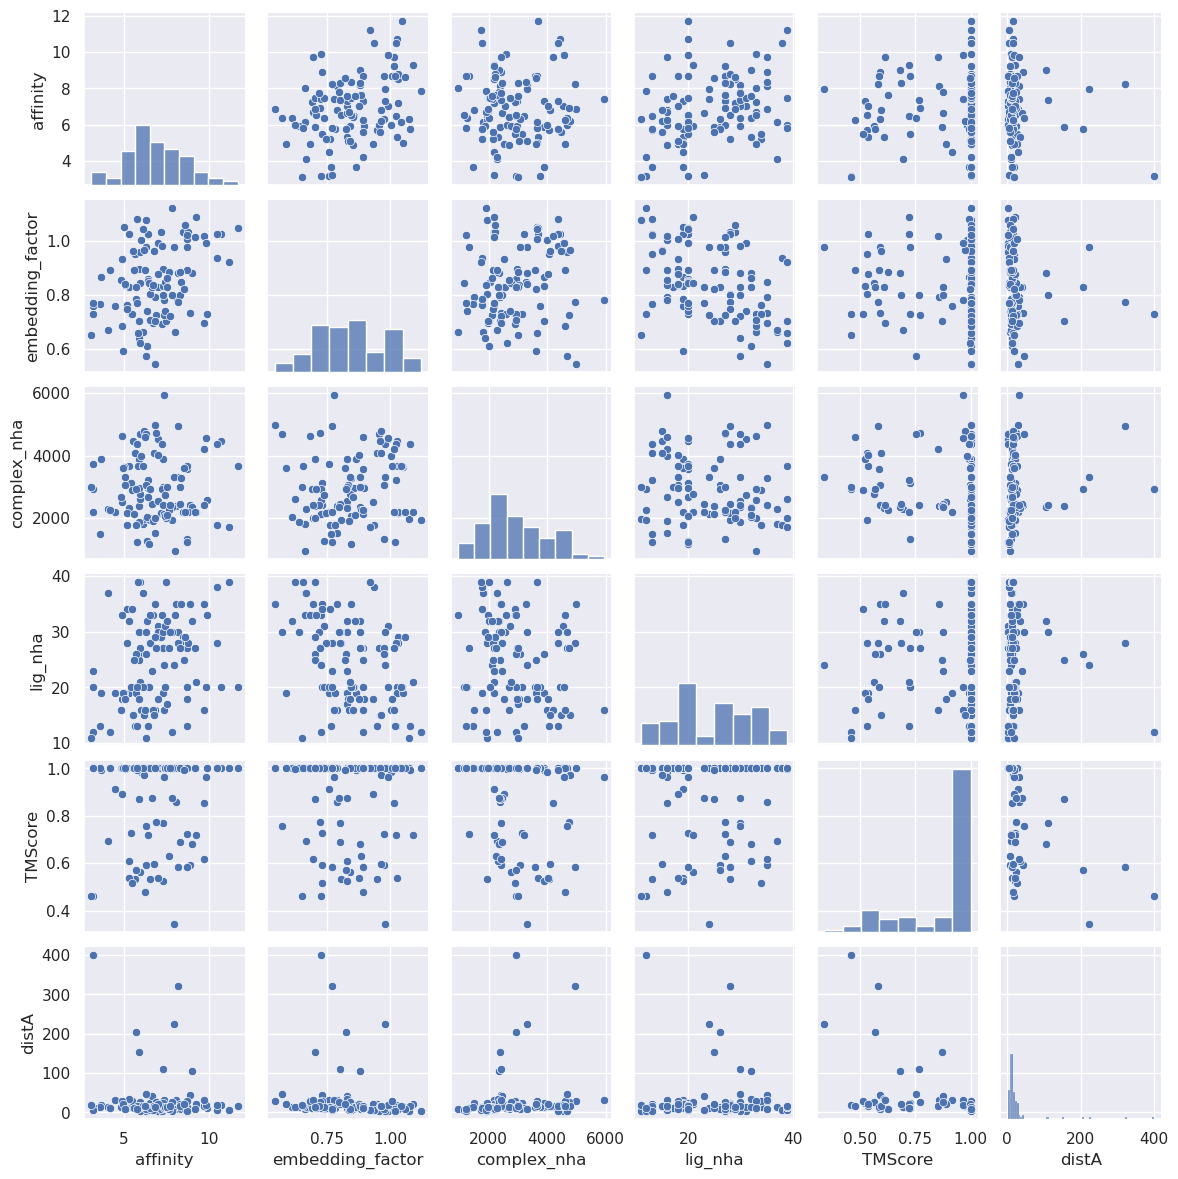

In [39]:
import pandas as pd
import numpy as np 
from BetaPose import cluster

title_csv = "/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/INDEX_ABS_SEL_TITSEQ.csv"; 
title_csv = "/home/yzhang/Documents/Personal_documents/BetaPose/test110.csv"
thetable = pd.read_csv(title_csv, index_col=0); 

embed_df = cluster.SequenceEmbed(thetable.seq); 
clusters = cluster.Agglomerative(embed_df, 50)
choice = cluster.RandomPerCluster(clusters, 3)

counts = np.unique(clusters, return_counts=True)
for i,j in zip(*counts): 
  if (i+1) % 5 == 0: 
    print(f"{i:>4} , {j:<4}")
  else: 
    print(f"{i:>4} , {j:<4} | ", end="")

theslice = thetable[["affinity","embedding_factor","complex_nha","lig_nha", "TMScore", "distA"]]
%matplotlib inline
import seaborn as sns; 
sns.set()
sns.pairplot(theslice, size=2);
# thetable

# Evaluate the clustering 

In [29]:
from sklearn import metrics
# scoremin=1;
# for i in range(2,100):
#   embed_df = np.array(embed_df)
#   clusters = cluster.ClusterAgglomerative(embed_df.T, i)
#   score = metrics.davies_bouldin_score(embed_df, clusters)
#   if score < scoremin: 
#     scoremin = score
#     print(f"Clusters {i} is scored {score}")
    
    
def OptimalCluster(data, cfunc, max_iter):
  scoremin=1;
  clustermin = 2; 
  for i in range(2, max_iter):
    data = np.array(data);
    clusters = cfunc(data, i);
    score = metrics.davies_bouldin_score(data, clusters);
    if score < scoremin: 
      scoremin = score;
      clustermin = i;
  print(f"Lowest Davies Bouldin score ({scoremin}) is achieved when clusters number is {clustermin}")
  return clustermin



def OptimalCluster2(data, cfunc, max_iter):
  score_best = -1;
  cluster_best = 2; 
  for i in range(2, max_iter):
    data = np.array(data);
    clusters = cfunc(data, i);
    scores = metrics.silhouette_samples(data, clusters);
    score = np.mean(scores);
    if score > score_best: 
      score_best = score;
      cluster_best = i;
#       print(f"C: {cluster_best} ; S: {score_best} ; \nScores: {np.count_nonzero(scores>0.5)} | {np.count_nonzero(scores<0.1)} {np.count_nonzero(scores>0.5)/len(data)}")
  print(f"Highest Silhouette Coefficient ({score_best}) is achieved when clusters number is {cluster_best}")
  return cluster_best


def OptimalCluster3(data, cfunc, max_iter):
  scoremin=1;
  clustermin = 2; 
  for i in range(2, max_iter):
    data = np.array(data);
    clusters = cfunc(data, i);
    score = metrics.calinski_harabasz_score(data, clusters);
    if score > scoremin: 
      scoremin = score;
      clustermin = i;
  print(f"Lowest Calinski and Harabasz score ({scoremin}) is achieved when clusters number is {clustermin}")
  return clustermin

# cluster.Agglomerative
func = bgmm
OptimalCluster(embed_df, func, 100)
OptimalCluster2(embed_df, func, 100)
OptimalCluster3(embed_df, func, 100)


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (79). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (81). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (82). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2

Lowest Davies Bouldin score (1.346513525279645e-07) is achieved when clusters number is 96


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (79). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (81). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (82). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2

Highest Silhouette Coefficient (0.7010037742369815) is achieved when clusters number is 55


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (79). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (80). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (81). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (82). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/yzhang/miniconda3/envs/mlprod2

Lowest Calinski and Harabasz score (2.264743372515769e+32) is achieved when clusters number is 80


/home/yzhang/miniconda3/envs/mlprod2/lib/python3.8/site-packages/sklearn/mixture/_base.py:143: ConvergenceWarning: Number of distinct clusters (78) found smaller than n_clusters (99). Possibly due to duplicate points in X.
  cluster.KMeans(


80

In [12]:
import numpy as np 

rows = thetable.loc[choice]; 
rows=rows.reset_index(); 
rows = rows.set_index("index"); 

status = (rows.lig_nha > 10) * (rows.lig_nha < 40) * (rows.complex_nha < 6035); 
print(f"Entries kept {np.count_nonzero(status)} after filtration"); 

rows = rows.loc[status]; 
rows = rows.reset_index(); 
rows = rows.set_index("index"); 
print(f"Total set: {len(rows.PDB)} , After unique: {len(set(rows.PDB))}")
rows


Entries kept 110 after filtration
Total: 110 , After 110


,PDB,resolution,year,affinity,kd/ki,embedding_factor,complex_nha,lig_nha,title,seq
index,,,,,,,,,,
8,1gi7,1.79,2002,4.51,Ki=31uM,0.760032,2187,19,A NOVEL SERINE PROTEASE INHIBITION MOTIF INVOL...,KPSSPPEELKFQCGQKTLRPRFK
19,1ydk,1.95,2005,5.89,Kd=1.3uM,0.703020,3888,26,CRYSTAL STRUCTURE OF THE I219A MUTANT OF HUMAN...,MAEKPKLHYFNARGRMESTRWLLAAAGVEFEEKFIKSAEDLDKLRN...
32,1ppc,1.80,1994,6.16,Ki=0.69uM,0.665085,1814,37,GEOMETRY OF BINDING OF THE BENZAMIDINE-AND ARG...,IVGGYTCGANTVPYQVSLNSGYHFCGGSLINSQWVVSAAHCYKSGI...
38,2a8g,1.99,2006,3.69,Kd=205uM,0.866161,3903,19,STRUCTURE OF AVIDIN IN COMPLEX WITH THE LIGAND...,KCSLTGKWTNDLGSNMTIGAVNSRGEFTGTYTTAVTATSNEIKESP...
45,7std,1.80,1999,10.72,Ki=19pM,1.025595,4453,20,SCYTALONE DEHYDRATASE PLUS INHIBITOR 4,GEITFSDYLGLMTCVYEWADSYDSKDWDRLRKVIAPTLRIDYRSFL...
...,...,...,...,...,...,...,...,...,...,...
638,1bgq,2.50,1999,8.57,Kd=2.7nM,0.823261,3607,25,RADICICOL BOUND TO THE ATP BINDING SITE OF THE...,MRGSHHHHHHGMASETFEFQAEITQLMSLIINTVYSNKEIFLRELI...
649,2vh6,1.95,2008,9.70,Ki=0.2nM,0.696058,2433,35,STRUCTURE AND PROPERTY BASED DESIGN OF FACTOR ...,IVGGQECKDGECPWQALLINEENEGFCGGTILSEFYILTAAHCLYQ...
656,1c5y,1.65,2000,4.20,Ki=63uM,0.892707,2275,12,STRUCTURAL BASIS FOR SELECTIVITY OF A SMALL MO...,KPSSPPEELKFQCGQKTLRPRFK


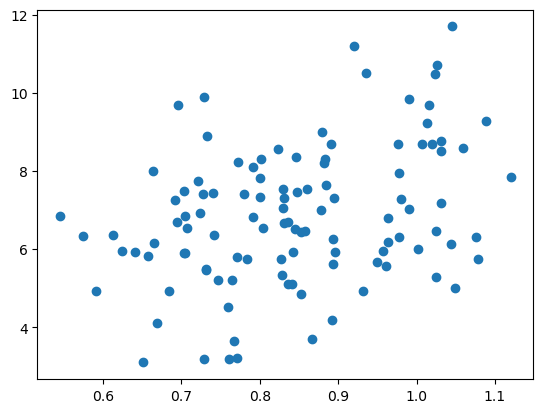

In [14]:
import matplotlib.pyplot as plt
plt.scatter(rows.embedding_factor, rows.affinity)
with open("/home/miemie/Dropbox/PhD/project_MD_ML/PDBbind_v2020_refined/index/test110.csv", "w") as file1: 
  file1.write(rows.to_csv())
